# handling missing values

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
df = pd.DataFrame([[np.nan,2],[3,np.nan],[np.nan,np.nan]], columns=list('AB')) #create 2D dataframe with nan values

In [6]:
df

,A,B
0,NaN,2.0
1,3.0,NaN
2,NaN,NaN


In [7]:
df.dropna(axis=1) #drop all values

""
0
1
2


In [9]:
df.dropna(axis=1, how='any') #drop column with any nan values

""
0
1
2


In [10]:
df.dropna(axis=1, how='all') #drop column with all nan values

,A,B
0,NaN,2.0
1,3.0,NaN
2,NaN,NaN


In [11]:
df.dropna(axis=0, how='all') #drop row with all nan values

,A,B
0,NaN,2.0
1,3.0,NaN


In [12]:
df

,A,B
0,NaN,2.0
1,3.0,NaN
2,NaN,NaN


In [13]:
df.dropna(axis=0, how='all', inplace=True) #inplace makes modification in existing dataframe

In [14]:
df

,A,B
0,NaN,2.0
1,3.0,NaN


In [16]:
df.fillna(5) #fill all nan with 5

,A,B
0,5.0,2.0
1,3.0,5.0


In [17]:
df

,A,B
0,NaN,2.0
1,3.0,NaN


In [19]:
df['A'].fillna(2) #fill particular element

0    2.0
1    3.0
Name: A, dtype: float64

In [21]:
df['A'].fillna(df['B']*2)

0    4.0
1    3.0
Name: A, dtype: float64

In [27]:
df.replace(np.NaN, "null") #replace nan with null

,A,B
0,null,2
1,3,null


In [29]:
df.replace(2, "hii") #replace any particular element

,A,B
0,NaN,hii
1,3.0,NaN


In [30]:
df

,A,B
0,NaN,2.0
1,3.0,NaN


# group by function

In [31]:
df = pd.DataFrame(data=[['A', 'Apple',70, 'Female'], ['B', 'Mango', 80, 'Male'], ['A', 'Gauava', 60, 'Female'], ['C', 'Apple', 100, 'Male']], columns=['Group', 'Items', 'Rate', 'Sex']) 

In [32]:
df

,Group,Items,Rate,Sex
0,A,Apple,70,Female
1,B,Mango,80,Male
2,A,Gauava,60,Female
3,C,Apple,100,Male


In [33]:
#apply functions 

In [34]:
df['Group'].count 

<bound method Series.count of 0    A
1    B
2    A
3    C
Name: Group, dtype: object>

In [37]:
df['Group'].value_counts() #gives total nos of members in a particular group

A    2
C    1
B    1
Name: Group, dtype: int64

In [38]:
df['Sex'].value_counts()

Female    2
Male      2
Name: Sex, dtype: int64

In [39]:
df['Items'].value_counts()

Apple     2
Mango     1
Gauava    1
Name: Items, dtype: int64

In [43]:
df['Rate'].sum() #gives sum

310

In [44]:
df['Group'].unique() #gives unique members

array(['A', 'B', 'C'], dtype=object)

In [46]:
df['Group'].nunique()

3

In [49]:
df.groupby('Group')

In [50]:
byGroup = df.groupby('Group')

In [51]:
byGroup.sum()

,Rate
Group,
A,130
B,80
C,100


In [52]:
byGroup.mean()

,Rate
Group,
A,65
B,80
C,100


In [57]:
df['Weight'] = [1000, 2000, 500, 6500] #add columns

In [58]:
df

,Group,Items,Rate,Sex,Weight
0,A,Apple,70,Female,1000
1,B,Mango,80,Male,2000
2,A,Gauava,60,Female,500
3,C,Apple,100,Male,6500


In [60]:
byGroup = df.groupby('Group')

In [61]:
byGroup.sum()

,Rate,Weight
Group,,
A,130,1500
B,80,2000
C,100,6500


In [68]:
byGroup.mean()

,Rate,Weight
Group,,
A,65,750
B,80,2000
C,100,6500


In [71]:
byGroup.describe()

Rate                                                     Weight  \
      count   mean       std    min    25%    50%    75%    max  count   
Group                                                                    
A       2.0   65.0  7.071068   60.0   62.5   65.0   67.5   70.0    2.0   
B       1.0   80.0       NaN   80.0   80.0   80.0   80.0   80.0    1.0   
C       1.0  100.0       NaN  100.0  100.0  100.0  100.0  100.0    1.0   

                                                                   
         mean         std     min     25%     50%     75%     max  
Group                                                              
A       750.0  353.553391   500.0   625.0   750.0   875.0  1000.0  
B      2000.0         NaN  2000.0  2000.0  2000.0  2000.0  2000.0  
C      6500.0         NaN  6500.0  6500.0  6500.0  6500.0  6500.0

In [72]:
df.groupby('Rate').describe()

Weight                                                    
      count    mean std     min     25%     50%     75%     max
Rate                                                           
60      1.0   500.0 NaN   500.0   500.0   500.0   500.0   500.0
70      1.0  1000.0 NaN  1000.0  1000.0  1000.0  1000.0  1000.0
80      1.0  2000.0 NaN  2000.0  2000.0  2000.0  2000.0  2000.0
100     1.0  6500.0 NaN  6500.0  6500.0  6500.0  6500.0  6500.0

# handling .csv, html and excel file

In [109]:
sf = pd.DataFrame(data=[[1,2],['hello',3]], index=['r1','r2'])

In [110]:
sf

,0,1
r1,1,2
r2,hello,3


In [112]:
sf.to_csv('TestCSV.csv') #create csv file named TestCSV

In [113]:
sf1 = pd.read_csv('TestCSV.csv') #read from csv file

In [114]:
sf1

,Unnamed: 0,0,1
0,r1,1,2
1,r2,hello,3


In [119]:
sf1 = pd.read_csv('TestCSV.csv', index_col=0)

In [116]:
sf1

,0,1
r1,1,2
r2,hello,3


In [120]:
#https://en.wikipedia.org/wiki/Pandas_(software)

In [123]:
sf2 = pd.read_html('https://en.wikipedia.org/wiki/Pandas_(software)')

In [125]:
type(sf2)

list

In [126]:
sf2[0]

,0,1
0,NaN,NaN
1,Original author(s),Wes McKinney
2,Developer(s),Community
3,NaN,NaN
4,Stable release,0.23.0[1] / 15 May 2018; 26 days ago (2018-05-15)
5,NaN,NaN
6,Repository,https://github.com/pandas-dev/pandas
7,Written in,Python
8,Operating system,Cross-platform
9,Type,Technical computing


In [127]:
sf2[1]

,0
0,v t e Scientific software in Python
1,NumPy SciPy matplotlib pandas scikit-learn sci...


In [128]:
sf

,0,1
r1,1,2
r2,hello,3


In [129]:
sf.to_excel('SampleEXCEL.xls')

In [130]:
sf = pd.read_excel('SampleEXCEL.xls')

In [131]:
sf

,0,1
r1,1,2
r2,hello,3


# Data visualization 

In [138]:
%matplotlib inline

In [134]:
rf = pd.DataFrame(data=np.random.randint(1,200, (100,3)), columns=['c1','c2','c3'])

In [136]:
rf.head()

,c1,c2,c3
0,20,105,94
1,126,3,180
2,48,23,55
3,176,46,72
4,32,26,104


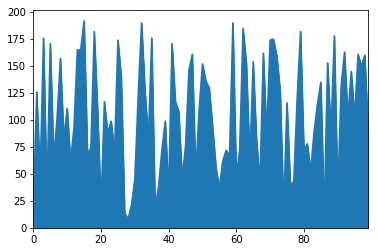

In [139]:
rf['c1'].plot.area()

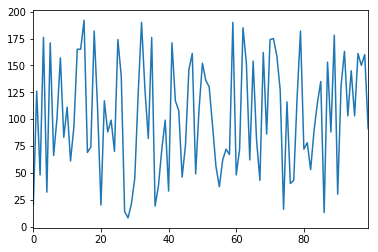

In [140]:
rf['c1'].plot.line()

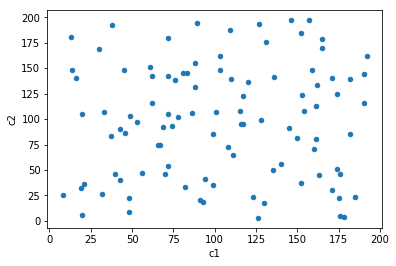

In [141]:
rf.plot.scatter(x='c1', y='c2')